<a href="https://colab.research.google.com/github/Nim-ah/MIE1614_Naive_Bias/blob/main/Naive_Bayes_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


#Pre Processing

In [125]:
text_data = open('SMSSpamCollection')
text = []
labels = []
for word in text_data:
    labels.append(word[:4].strip())
    text.append(word[4:].strip())

In [126]:
df = pd.DataFrame({"labels":labels, "text": text})
df

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [98]:
df2 = df['labels'][0:]
df_answers_encode = {}
for i, answer in enumerate(df2):
    #print(answer)
    if answer == "spam":
      df_answers_encode[answer] = 1
    else:
      df_answers_encode[answer] = 0

df['labels'] = df2.map(df_answers_encode)

In [99]:
df

,labels,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,1,This is the 2nd time we have tried 2 contact u...
5570,0,Will ü b going to esplanade fr home?
5571,0,"Pity, * was in mood for that. So...any other s..."
5572,0,The guy did some bitching but I acted like i'd...


In [117]:
cv = CountVectorizer()
X = cv.fit_transform(df.text).toarray()
y = df.labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [128]:
print(cv.fit_transform(df.text))

  (0, 3571)	1
  (0, 8084)	1
  (0, 4374)	1
  (0, 5958)	1
  (0, 2338)	1
  (0, 1316)	1
  (0, 5571)	1
  (0, 4114)	1
  (0, 1767)	1
  (0, 3655)	1
  (0, 8548)	1
  (0, 4501)	1
  (0, 1765)	1
  (0, 2061)	1
  (0, 7694)	1
  (0, 3615)	1
  (0, 1082)	1
  (0, 8324)	1
  (1, 5538)	1
  (1, 4537)	1
  (1, 4342)	1
  (1, 8450)	1
  (1, 5567)	1
  (2, 4114)	1
  (2, 3373)	1
  :	:
  (5572, 4245)	1
  (5572, 8371)	1
  (5572, 1097)	1
  (5572, 4642)	1
  (5572, 7089)	1
  (5572, 3323)	1
  (5572, 7674)	1
  (5572, 1451)	1
  (5572, 5367)	1
  (5572, 2606)	1
  (5572, 8120)	1
  (5572, 1794)	1
  (5572, 7099)	1
  (5572, 2905)	1
  (5572, 3489)	1
  (5572, 1802)	1
  (5572, 3709)	1
  (5572, 4188)	1
  (5572, 914)	1
  (5572, 1561)	1
  (5573, 7806)	1
  (5573, 5276)	1
  (5573, 4253)	2
  (5573, 7938)	1
  (5573, 6548)	1


#Model (GaussianNB)

In [109]:
import matplotlib.pyplot as plt
# Taken from the scikit-learn documentation
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if title == True:
          title = 'Confusion matrix for model (A)'
    else:
          title = 'Confusion matrix for ULMFiT'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

/usr/local/lib/python3.8/dist-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[[969   8]
 [  7 131]]
0.9865470852017937
0.9458483754512634
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       977
           1       0.94      0.95      0.95       138

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



<AxesSubplot:title={'center':'Confusion matrix for ULMFiT'}, xlabel='Predicted label', ylabel='True label'>

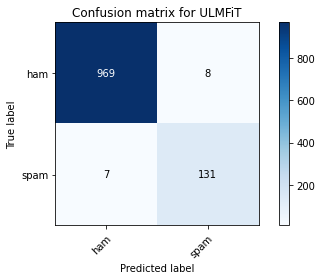

In [134]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
classifier = MultinomialNB(alpha=0.00000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)
f1_s = f1_score(y_test, y_pred)
print(f1_s)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"])

[[883  94]
 [  8 130]]
0.9085201793721973
0.718232044198895
              precision    recall  f1-score   support

           0       0.99      0.90      0.95       977
           1       0.58      0.94      0.72       138

    accuracy                           0.91      1115
   macro avg       0.79      0.92      0.83      1115
weighted avg       0.94      0.91      0.92      1115



<AxesSubplot:title={'center':'Confusion matrix for ULMFiT'}, xlabel='Predicted label', ylabel='True label'>

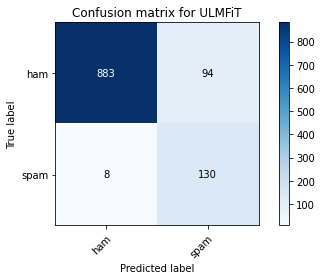

In [114]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)
f1_s = f1_score(y_test, y_pred)
print(f1_s)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"])

[[961  16]
 [  5 133]]
0.9811659192825112
0.9268292682926829
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       977
           1       0.89      0.96      0.93       138

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



<AxesSubplot:title={'center':'Confusion matrix for ULMFiT'}, xlabel='Predicted label', ylabel='True label'>

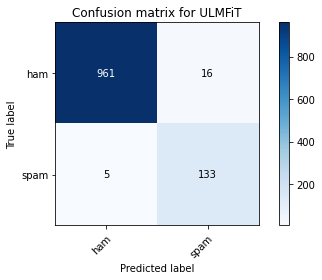

In [115]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)
f1_s = f1_score(y_test, y_pred)
print(f1_s)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, classes=["ham", "spam"])